<a href="https://colab.research.google.com/github/AYA-NASH/NN_with_TensorFlow/blob/main/8_Introduction_to_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Dowmnloading helper functions

In [1]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-06-01 09:43:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-01 09:43:24 (77.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

####Getting the dataset:

In [3]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-7603da21-4fc0-ad6b-0223-1d5dd0e31c0d)


In [4]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2023-06-01 09:43:31--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 173.194.79.128, 108.177.96.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  1.31MB/s    in 0.4s    

2023-06-01 09:43:31 (1.31 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



####Visualizing the text dataset

In [5]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [6]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
# shuffling dataset:
train_shuffled = train_df.sample(frac = 1, random_state = 42)
test_shuffled = test_df.sample(frac = 1, random_state = 42)

In [9]:
train_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [10]:
# the number of examples of each class
# 1 = a real disaster Tweet
# 0 = not a real disaster Tweet
train_shuffled.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [11]:
# the total number of samples
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")


Total training samples: 7613
Total test samples: 3263
Total samples: 10876


**Visualizing random Examples**

In [12]:
import random

random_index = random.randint(0, len(train_shuffled)-5)

for row in train_shuffled[["text","target"]][random_index: random_index + 5].itertuples():
  _, text, target = row
  print(f"Target : {target}","(is a disaster)" if (target > 0) else "(Not a disaster)")
  print(f"Text:\n{text}")
  print("\n----------")

Target : 1 (is a disaster)
Text:
Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legio... http://t.co/uCBfgIBFOR #MuhamadJabal

----------
Target : 0 (Not a disaster)
Text:
'If plan A does not work don't panic bc there are 25 more letters.' I like this but feel like I may be running out of letters- thoughts?

----------
Target : 0 (Not a disaster)
Text:
louis is sad. cancel the show now. everyone leave. evacuate. this CANNOT go on.

----------
Target : 1 (is a disaster)
Text:
Watch This Airport Get Swallowed Up By A Sandstorm In Under A Minute http://t.co/akNyNPv461

----------
Target : 0 (Not a disaster)
Text:
Was in a bad ass mood today got on the elevator at school and decided to make explosion noses everytime some one pressed a button ??

----------


**Split Training data to train and dev sets :**

In [13]:
train_shuffled["text"]

2644    So you have a new weapon that can cause un-ima...
2227    The f$&amp;@ing things I do for #GISHWHES Just...
5448    DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...
132     Aftershock back to school kick off was great. ...
6845    in response to trauma Children of Addicts deve...
                              ...                        
5226    @Eganator2000 There aren't many Obliteration s...
5390    just had a panic attack bc I don't have enough...
860     Omron HEM-712C Automatic Blood Pressure Monito...
7603    Officials say a quarantine is in place at an A...
7270    I moved to England five years ago today. What ...
Name: text, Length: 7613, dtype: object

In [14]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_shuffled["text"].to_numpy(),
                                                                            train_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [15]:
train_sentences.shape , train_labels

((6851,), array([0, 0, 1, ..., 1, 1, 0]))

In [16]:
val_sentences.shape

(762,)

####Converting text into numbers:

In [17]:
# the average of the number of words in tweets
# i is the i_th tweet of our training data
# i.split(): returns the tweet as a list of words

max_length = round(sum([len(i.split()) for i in  train_sentences])/len(train_sentences))

max_vocab_length = 10000

In [18]:
from tensorflow.keras.layers import TextVectorization

text_tokenizer = TextVectorization(max_tokens = max_vocab_length,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None, # token-single word
                                    output_mode='int', # convert to int
                                    output_sequence_length=max_length)

In [19]:
text_tokenizer.adapt(train_sentences)

In [20]:
x = train_sentences[0]
x

'@mogacola @zamtriossu i screamed after hitting tweet'

In [21]:
text_tokenizer([x])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1, 6507,    8,  387,   43, 2956,  978,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [22]:
random_sentence = random.choice(train_sentences)
print(f"The original Sentence :\n {random_sentence} \n\nThe vectorized version of the sentence:\n {text_tokenizer([random_sentence])}")

The original Sentence :
 Zayn just blew up twitter. 

The vectorized version of the sentence:
 [[3230   29  555   27  382    0    0    0    0    0    0    0    0    0
     0]]


In [23]:
 vocabulary = text_tokenizer.get_vocabulary()

 len(vocabulary) , vocabulary[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

####Creating Embeddings

In [24]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim= max_vocab_length, # the length of the vocabulary vector
                      output_dim = 128,
                      input_length = max_length, #the length of the input length
                      name="embedding_1")

In [25]:
embedding

In [26]:
random_sentence

'Zayn just blew up twitter.'

In [27]:
print(f"The original sentence:\n{random_sentence}\n\nThe Embedded Representation:")

# passing the sentence to the embedding sentence in numeric form(i.e.the indexes)
embedded_sentence = embedding(text_tokenizer([random_sentence]))

embedded_sentence

The original sentence:
Zayn just blew up twitter.

The Embedded Representation:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.02184589, -0.02795401,  0.02486226, ..., -0.04575329,
          0.00373245,  0.03905365],
        [ 0.04899779,  0.03990472,  0.0095895 , ...,  0.03179586,
          0.01560975, -0.02962084],
        [-0.00025303, -0.00514521, -0.02205512, ..., -0.01410986,
         -0.04365202,  0.0202878 ],
        ...,
        [ 0.01984972,  0.01202608, -0.00408264, ..., -0.01893326,
          0.01489848,  0.04399547],
        [ 0.01984972,  0.01202608, -0.00408264, ..., -0.01893326,
          0.01489848,  0.04399547],
        [ 0.01984972,  0.01202608, -0.00408264, ..., -0.01893326,
          0.01489848,  0.04399547]]], dtype=float32)>

In [28]:
print(random_sentence[0])
print(embedded_sentence[0][0])

Z
tf.Tensor(
[ 0.02184589 -0.02795401  0.02486226 -0.03802208  0.00893348  0.00982287
  0.00822098  0.02754528 -0.03648249  0.0213447   0.04577105  0.00180971
  0.03632287 -0.03866066 -0.03417382 -0.01561793  0.01144096 -0.02162256
 -0.04117246 -0.0205821   0.01475826 -0.03724922  0.00845934 -0.02278999
 -0.02490326 -0.03128584  0.03497076 -0.03504825 -0.0289914  -0.00106173
 -0.04336315  0.02520588 -0.02786871 -0.0390641  -0.0196888   0.02008139
 -0.00284199 -0.04712863  0.04493058  0.04650712  0.00223295  0.0074055
  0.04968594  0.01071209  0.03575538 -0.0188598  -0.0416361   0.00186555
  0.02297461 -0.00833948 -0.0268108  -0.00934424 -0.04839895 -0.03879466
  0.00954633 -0.04237381  0.01707944 -0.02395879  0.03834153 -0.02752953
  0.00069539  0.00381302 -0.03119705 -0.01410025 -0.0486256  -0.02426232
 -0.01280264 -0.00277894 -0.03079056 -0.02332048 -0.04484453 -0.01540131
  0.03417772  0.02917494  0.03939337  0.02831762  0.03454869 -0.04951387
 -0.00924128 -0.0391308   0.00730733  0

###Modeling a text dataset

####Model 0: baseline

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline(
    [
        ("tfidf", TfidfVectorizer()),
        ("clf", MultinomialNB()),
    ]
)

In [30]:
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [31]:
# Evaluating the baseline model:
baseline_score = model_0.score(val_sentences, val_labels)

print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [32]:
# Making predictions:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]


array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [33]:
val_labels[:20]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

**Creating an evaluation function for our model experiments**

In [34]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(true_labels, predicted_labels):
  model_accuracy = accuracy_score(true_labels, predicted_labels)
  precision, recall, f_score, _ = precision_recall_fscore_support(true_labels,
                                                                  predicted_labels,
                                                                  average = 'weighted')
  model_results = {"accuracy": model_accuracy*100,
             "precision": precision,
             "recall": recall,
             "f_score": f_score
  }

  return model_results

In [35]:
baseline_results = calculate_results(val_labels, baseline_preds)

baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f_score': 0.7862189758049549}

####Model1:Feedforward network

In [36]:
# creating a tensorboard
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [37]:
from tensorflow.keras import layers
import tensorflow as tf

inputs = layers.Input(shape=(1,), dtype= "string")
# converting the string into tokens (passing the inputs to the text vectorizer)
x = text_tokenizer(inputs)
# turn tokens into embeddings
x = embedding(x)
# condense the feature vector for each token to one vector
x = layers.GlobalAveragePooling1D()(x)
# the output layer (single output unit since it is a binary classification problem)
output = layers.Dense(1, activation = "sigmoid")(x)

# combine inputs and outputs
model_1 = tf.keras.Model(inputs, output, name = "model_1_dense")

In [38]:
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [39]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [40]:
history_1 = model_1.fit(x=train_sentences,
                        y=train_labels,
                        validation_data = (val_sentences, val_labels),
                        epochs = 5,
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                              experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230601-094338
Epoch 1/5
215/215 [==============================] - 24s 82ms/step - loss: 0.6144 - accuracy: 0.6898 - val_loss: 0.5383 - val_accuracy: 0.7546
Epoch 2/5
215/215 [==============================] - 6s 26ms/step - loss: 0.4425 - accuracy: 0.8168 - val_loss: 0.4716 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3480 - accuracy: 0.8608 - val_loss: 0.4568 - val_accuracy: 0.7927
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2858 - accuracy: 0.8889 - val_loss: 0.4657 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2386 - accuracy: 0.9107 - val_loss: 0.4803 - val_accuracy: 0.7861


In [41]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.4803 - accuracy: 0.7861


[0.4803350269794464, 0.7860892415046692]

In [42]:
# making predictions:
model1_pred_probs = model_1.predict(val_sentences)

24/24 [==============================] - 0s 3ms/step


In [43]:
model1_pred_probs[:10]

array([[0.31149837],
       [0.7490605 ],
       [0.9979273 ],
       [0.09976424],
       [0.11876866],
       [0.933845  ],
       [0.90810096],
       [0.9941777 ],
       [0.9584064 ],
       [0.24505995]], dtype=float32)

In [44]:
model1_pred_probs.shape

(762, 1)

In [45]:
# squeeze the model predictions and round it so it can be compared with the true labels
model1_preds = tf.squeeze(tf.round(model1_pred_probs))

In [46]:
model1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [47]:
# Evaluating the model with different evaluation metrics
model_1_results = calculate_results(val_labels, model1_preds)

In [48]:
model_1_results

{'accuracy': 78.60892388451444,
 'precision': 0.7916211438846743,
 'recall': 0.7860892388451444,
 'f_score': 0.782856754224963}

In [49]:
import numpy as np

np.array(list(model_1_results.values())) > np.array(list(baseline_results.values())) 

array([False, False, False, False])

####Visualizing the learned Embedding

The embeddings are weights of the Embedding layer in the model. The weights matrix is of shape (vocab_size, embedding_dimension)




In [50]:
word_weights = model_1.get_layer("embedding_1").get_weights()[0]

In [51]:
word_weights.shape

(10000, 128)

In [52]:
vocabulary[:10]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

In [53]:
# uploading embedding matrix and its metadata to tsv files to be visualize them using the "Tensorflow Projector" tool
import io

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

# each word in the vocabulary has an embedding vector
# writing vectors to the files
for index, word in enumerate(vocabulary):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = word_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
  
out_v.close()
out_m.close()

In [54]:
# to download these files to the local machine
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####Model_2: LSTM

In [137]:
from tensorflow.keras import layers

model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")

inputs =  layers.Input(shape=(1,), dtype= "string")
# tokenize the input stream
x = text_tokenizer(inputs)
# converting into embeddings

x = model_2_embedding(x)
print(x.shape)
# passing vectors to the LSTM layer
# x = layers.LSTM(64, return_sequences = True)(x)
# print(x.shape)
# x = layers.LSTM(64, return_sequences = True)(x)
# print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name = "model_2_LSTM")

(None, 15, 128)
(None, 64)


In [138]:
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [139]:
history_2 = model_2.fit(x=train_sentences,
                        y=train_labels,
                        validation_data = (val_sentences, val_labels),
                        epochs = 5,
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                  experiment_name="LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20230601-101155
Epoch 1/5
215/215 [==============================] - 19s 70ms/step - loss: 0.5091 - accuracy: 0.7447 - val_loss: 0.4829 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.3191 - accuracy: 0.8698 - val_loss: 0.5193 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2180 - accuracy: 0.9174 - val_loss: 0.5119 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 4s 20ms/step - loss: 0.1592 - accuracy: 0.9431 - val_loss: 0.6456 - val_accuracy: 0.7625
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1072 - accuracy: 0.9620 - val_loss: 0.8304 - val_accuracy: 0.7625


In [140]:
# evaluate the model
model_2.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 0.8304 - accuracy: 0.7625


[0.8304469585418701, 0.7624672055244446]

In [141]:
model_2_pred_probs = model_2.predict(val_sentences)

model_2_pred_probs[:10]

24/24 [==============================] - 1s 5ms/step


array([[0.10329234],
       [0.7616808 ],
       [0.9991279 ],
       [0.02635075],
       [0.00349794],
       [0.99929726],
       [0.9542595 ],
       [0.99965847],
       [0.999315  ],
       [0.07974569]], dtype=float32)

In [142]:
model2_preds = tf.squeeze(tf.round(model_2_pred_probs))

In [143]:
# evaluating the model using different metrics
model_2_results = calculate_results(val_labels, model2_preds)

model_2_results

{'accuracy': 76.24671916010499,
 'precision': 0.7631352147335341,
 'recall': 0.7624671916010499,
 'f_score': 0.7607595644846901}

In [144]:
import numpy as np

np.array(list(model_2_results.values())) > np.array(list(baseline_results.values())) 

array([False, False, False, False])

####Model_3: GRU

In [145]:
from tensorflow.keras import layers

model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

inputs =  layers.Input(shape=(1,), dtype= "string")
# tokenize the input stream
x = text_tokenizer(inputs)
# converting into embeddings
x = model_3_embedding(x)
print(x.shape)
# x = layers.GRU(64, return_sequences = True)(x)
# print(x.shape)
x = layers.GRU(64)(x)
print(x.shape)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name = "model_3_GRU")

(None, 15, 128)
(None, 64)


In [146]:
model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [147]:
history_3 = model_3.fit(x=train_sentences,
                        y=train_labels,
                        validation_data = (val_sentences, val_labels),
                        epochs = 5,
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                      experiment_name="GRU")])

Saving TensorBoard log files to: model_logs/GRU/20230601-101240
Epoch 1/5
215/215 [==============================] - 17s 65ms/step - loss: 0.5346 - accuracy: 0.7257 - val_loss: 0.4493 - val_accuracy: 0.7900
Epoch 2/5
215/215 [==============================] - 5s 21ms/step - loss: 0.3207 - accuracy: 0.8657 - val_loss: 0.4834 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.2139 - accuracy: 0.9196 - val_loss: 0.5445 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1547 - accuracy: 0.9425 - val_loss: 0.5939 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1214 - accuracy: 0.9587 - val_loss: 0.6881 - val_accuracy: 0.7703


In [148]:
# evaluate the model
model_3.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 0.6881 - accuracy: 0.7703


[0.688079833984375, 0.7703412175178528]

In [149]:
model_3_pred_probs = model_3.predict(val_sentences)
model3_preds = tf.squeeze(tf.round(model_3_pred_probs))

# evaluating the model using different metrics
model_3_results = calculate_results(val_labels, model3_preds)

model_3_results
# model_3_pred_probs[:10]

24/24 [==============================] - 0s 4ms/step


{'accuracy': 77.03412073490814,
 'precision': 0.7760118694840564,
 'recall': 0.7703412073490814,
 'f_score': 0.7665375100103654}

####Model_4: Bidirectional RNN

In [150]:
from tensorflow.keras import layers

model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

inputs = layers.Input(shape=(1,), dtype= "string")
# tokenize the input stream
x = text_tokenizer(inputs)
# converting into embeddings
x = model_4_embedding(x)

# forward_layer = layers.LSTM(64)
# backward_layer = layers.LSTM(64, activation='relu',
#                       go_backwards=True)

# x = layers.Bidirectional(forward_layer, backward_layer=backward_layer)(x)

x = layers.Bidirectional(layers.LSTM(64))(x)

outputs = layers.Dense(1, activation = "sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name = "model_4_Bidirectional")



In [151]:
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [152]:
model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [153]:
history_4 = model_4.fit(x=train_sentences,
                        y=train_labels,
                        validation_data = (val_sentences, val_labels),
                        epochs = 5,
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                  experiment_name="Bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/Bidirectional_RNN/20230601-101325
Epoch 1/5
215/215 [==============================] - 23s 77ms/step - loss: 0.5124 - accuracy: 0.7476 - val_loss: 0.4585 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3070 - accuracy: 0.8806 - val_loss: 0.5065 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.2062 - accuracy: 0.9244 - val_loss: 0.5729 - val_accuracy: 0.7808
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1439 - accuracy: 0.9507 - val_loss: 0.6004 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0971 - accuracy: 0.9663 - val_loss: 0.8376 - val_accuracy: 0.7625


In [154]:
# evaluate the model
model_4.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 6ms/step - loss: 0.8376 - accuracy: 0.7625


[0.8376098871231079, 0.7624672055244446]

In [155]:
model4_pred_probs = model_4.predict(val_sentences)

model4_pred_probs[:10]

24/24 [==============================] - 1s 5ms/step


array([[0.20756081],
       [0.7689074 ],
       [0.99971956],
       [0.11711714],
       [0.00866354],
       [0.9983303 ],
       [0.29160714],
       [0.99988925],
       [0.99981505],
       [0.22291261]], dtype=float32)

In [156]:
model4_preds = tf.squeeze(tf.round(model4_pred_probs))

model4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 0.], dtype=float32)>

In [157]:
# evaluating the model using different metrics
model_4_results = calculate_results(val_labels, model4_preds)

model_4_results

{'accuracy': 76.24671916010499,
 'precision': 0.7629611993882945,
 'recall': 0.7624671916010499,
 'f_score': 0.7608791530897157}

In [158]:
import numpy as np

np.array(list(model_4_results.values())) > np.array(list(baseline_results.values())) 

array([False, False, False, False])

####Model_5: 1D CNN

In [159]:
from tensorflow.keras import layers

model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

inputs = layers.Input(shape=(1,), dtype = "string")


x = text_tokenizer(inputs)
x = model_5_embedding(x)

x = layers.Conv1D(filters = 32, 
                  kernel_size=5,
                  padding = 'valid',
                  strides=1,
                  activation = 'relu')(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.GlobalAveragePooling1D()(x)

# x = layers.Dense(64, activation = 'relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs, output, name = "model_5_1d_CNN")

In [160]:
model_5.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

In [161]:
model_5.summary()

Model: "model_5_1d_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_12 (Dense)            (None, 1)              

In [162]:
history_5 = model_5.fit(x=train_sentences,
                        y=train_labels,
                        validation_data = (val_sentences, val_labels),
                        epochs = 5,
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                  experiment_name="1D_CNN")])

Saving TensorBoard log files to: model_logs/1D_CNN/20230601-101413
Epoch 1/5
215/215 [==============================] - 16s 68ms/step - loss: 0.5627 - accuracy: 0.7203 - val_loss: 0.4851 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 5s 21ms/step - loss: 0.3459 - accuracy: 0.8613 - val_loss: 0.4736 - val_accuracy: 0.7940
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2148 - accuracy: 0.9235 - val_loss: 0.5279 - val_accuracy: 0.7835
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1343 - accuracy: 0.9578 - val_loss: 0.5987 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0969 - accuracy: 0.9686 - val_loss: 0.6512 - val_accuracy: 0.7743


In [163]:
model_5_preds_probs = model_5.predict(val_sentences)

model_5_preds_probs[:10]

24/24 [==============================] - 0s 4ms/step


array([[0.78067774],
       [0.7256513 ],
       [0.9994122 ],
       [0.06676231],
       [0.00210034],
       [0.9951652 ],
       [0.94391495],
       [0.99787486],
       [0.99900275],
       [0.3051131 ]], dtype=float32)

In [164]:
model_5_preds = tf.squeeze(tf.round(model_5_preds_probs))

model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [165]:
model_5_results = calculate_results(val_labels, model_5_preds)
model_5_results

{'accuracy': 77.42782152230971,
 'precision': 0.7757380419380466,
 'recall': 0.7742782152230971,
 'f_score': 0.7723566516531356}

In [166]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f_score': 0.7862189758049549}

####Model_6: Pre-trained Feature Extractor

In [85]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])

print(embeddings)

tf.Tensor(
[[-0.03133018 -0.06338634 -0.01607501 ... -0.03242778 -0.04575738
   0.05370455]
 [ 0.0508086  -0.0165243   0.01573778 ...  0.00976659  0.03170121
   0.01788118]], shape=(2, 512), dtype=float32)


In [86]:
# Using the USE pre-trained model as an Embedding layer
# convert the USE model to a keras layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape = [], # the shape of the input coming to the layer (various lengths)
                                        dtype = "string",
                                        trainable = False,
                                        name = "USE") # type of the incoming data

Building Model_6 using the use layer

In [87]:
import tensorflow as tf
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name = "model_6_USE")

In [88]:
model_6.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [89]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [90]:
history_6 = model_6.fit(x=train_sentences,
                        y=train_labels,
                        validation_data = (val_sentences, val_labels),
                        epochs = 5,
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                  experiment_name="tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230601-094714
Epoch 1/5
215/215 [==============================] - 9s 23ms/step - loss: 0.5032 - accuracy: 0.7867 - val_loss: 0.4521 - val_accuracy: 0.7927
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.4136 - accuracy: 0.8132 - val_loss: 0.4355 - val_accuracy: 0.8123
Epoch 3/5
215/215 [==============================] - 5s 24ms/step - loss: 0.4016 - accuracy: 0.8199 - val_loss: 0.4354 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3946 - accuracy: 0.8260 - val_loss: 0.4286 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3873 - accuracy: 0.8288 - val_loss: 0.4283 - val_accuracy: 0.8150


In [91]:
model_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 14ms/step - loss: 0.4283 - accuracy: 0.8150


[0.4282679259777069, 0.8149606585502625]

In [92]:
model_6_pred_probs = model_6.predict(val_sentences)

24/24 [==============================] - 1s 14ms/step


In [93]:
model_6_pred_probs.shape , val_labels.shape

((762, 1), (762,))

In [94]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))

In [95]:
 model_6_preds.shape , val_labels.shape 

(TensorShape([762]), (762,))

In [96]:
model_6_results = calculate_results(model_6_preds, val_labels)

model_6_results

{'accuracy': 81.49606299212599,
 'precision': 0.8238956309246952,
 'recall': 0.8149606299212598,
 'f_score': 0.8165869439249924}

In [97]:
import numpy as np

np.array(list(model_6_results.values())) > np.array(list(baseline_results.values())) 

array([ True,  True,  True,  True])

####Model_7: TensorFlow Hub Pretrained Sentence Encoder 10% of the training data

In [98]:
# # preparing the data
# # first trial 
# train_10_percent = train_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

In [99]:
# fixing the data leakage problem:
train_10_percent_split = int(0.1 * len(train_sentences))

train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

print(len(train_sentences_10_percent), len(train_labels_10_percent))

print(pd.Series(train_labels_10_percent).value_counts())

685 685
0    406
1    279
dtype: int64


In [100]:
# anothe way to split the data:
# (split the already split train_sentences/train_labels)
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)


In [101]:
# model_7 is the same as model_6
# model_7 = tf.keras.models.clone_model(model_6) # model's name is the same as model_6's name
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name = "model_7_USE")

model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [102]:
model_7.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [103]:
history_7 = model_7.fit(x=train_sentences_10_percent,
                        y=train_labels_10_percent,
                        validation_data = (val_sentences, val_labels),
                        epochs = 5,
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                  experiment_name="tf_hub_sentence_encoder_10_percent")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent/20230601-094742
Epoch 1/5
22/22 [==============================] - 4s 57ms/step - loss: 0.6769 - accuracy: 0.6283 - val_loss: 0.6512 - val_accuracy: 0.7559
Epoch 2/5
22/22 [==============================] - 1s 32ms/step - loss: 0.6071 - accuracy: 0.8076 - val_loss: 0.5988 - val_accuracy: 0.7507
Epoch 3/5
22/22 [==============================] - 1s 32ms/step - loss: 0.5321 - accuracy: 0.8207 - val_loss: 0.5434 - val_accuracy: 0.7612
Epoch 4/5
22/22 [==============================] - 1s 32ms/step - loss: 0.4668 - accuracy: 0.8353 - val_loss: 0.5088 - val_accuracy: 0.7743
Epoch 5/5
22/22 [==============================] - 1s 33ms/step - loss: 0.4202 - accuracy: 0.8353 - val_loss: 0.4919 - val_accuracy: 0.7677


In [104]:
model_7_pred_probs = model_7.predict(val_sentences)

24/24 [==============================] - 1s 14ms/step


In [105]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))

In [106]:
model_7_results = calculate_results(model_7_preds, val_labels)

model_7_results

{'accuracy': 76.77165354330708,
 'precision': 0.7868602881411437,
 'recall': 0.7677165354330708,
 'f_score': 0.7713933443303289}

In [107]:
import numpy as np

# np.array(list(model_7_results.values())) > np.array(list(model_6_results.values())) 
# using the first trial leads to the following result(model_7 outperforming model_6's performance which doens't make sense)
# array([ True,  True,  True,  True])
np.array(list(model_7_results.values())) > np.array(list(model_6_results.values())) 

array([False, False, False, False])

###Comparing the performance of all models:

In [108]:
# combine all results into a dataframe
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_feedforwardNN": model_1_results,
                                  "2_LSTM": model_2_results,
                                  "3_GRU":model_3_results,
                                  "4_Bidirectional":model_4_results,
                                  "5_1D_CNN": model_5_results,
                                  "6_Pre-trained Feature Extractor": model_6_results,
                                  "7_Pre-trained Feature Extractor 10 percent":model_7_results})


all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f_score
0_baseline,79.265092,0.811139,0.792651,0.786219
1_feedforwardNN,78.608924,0.791621,0.786089,0.782857
2_LSTM,77.690289,0.780226,0.776903,0.774209
3_GRU,77.427822,0.775504,0.774278,0.772479
4_Bidirectional,75.721785,0.757209,0.757218,0.755940
5_1D_CNN,76.640420,0.766730,0.766404,0.765012
6_Pre-trained Feature Extractor,81.496063,0.823896,0.814961,0.816587
7_Pre-trained Feature Extractor 10 percent,76.771654,0.786860,0.767717,0.771393


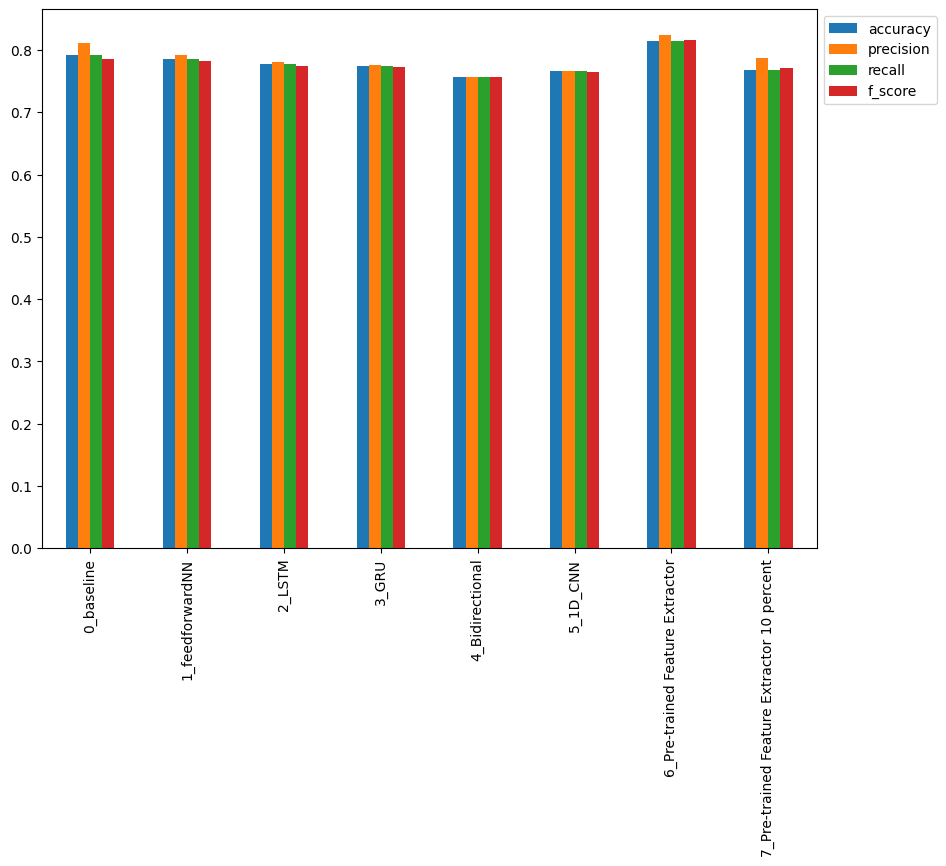

In [109]:
# plotting the dataframe
all_model_results["accuracy"] = all_model_results["accuracy"]/100 

all_model_results.plot(kind = 'bar',figsize=(10,7)).legend(bbox_to_anchor=(1.0, 1.0))

<Axes: >

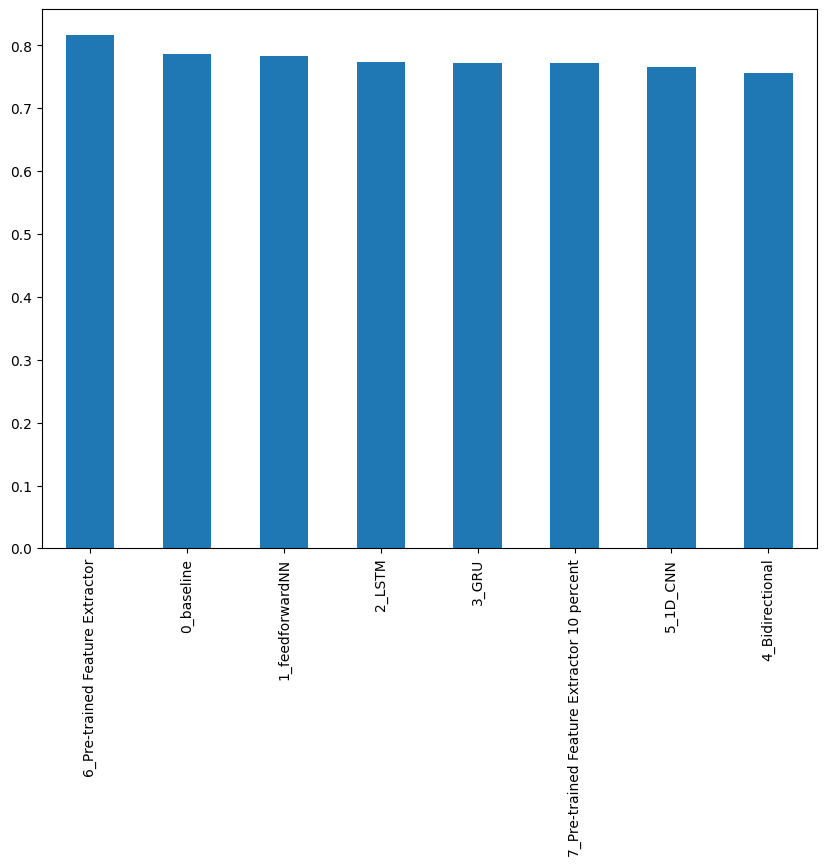

In [110]:
# plotting only the f1 score:
all_model_results.sort_values("f_score", ascending = False)["f_score"].plot(kind = 'bar',figsize=(10,7))

###Comparing models using tensorboard

In [ ]:
!pip install -U tensorboard

In [ ]:
!tensorboard dev upload --logdir model_logs \
  --name "NLP modelling experiments" \
  --description "A series of different NLP modellings experiments with various models" \
  --one_shot

In [ ]:
!tensorboard dev delete --experiment_id WX8Ap4U0QN21gdFXMU8YbA

###Combine models (model ensembling/stacking):

there are a few of ways we can combine our models:

- **Averaging** - Take the output prediction probabilities of each model for each sample, combine them and then average them.
- **Majority** vote (mode) - Make class predictions with each of your models on all samples, the predicted class is the one in majority. For example, if three different models predict [1, 0, 1] respectively, the majority class is 1, therefore, that would be the predicted label.
- **Model stacking** - Take the outputs of each of your chosen models and use them as inputs to another model.

In [179]:
# combine baseline model (model_0), LSTM model (model_2) and USE model trained on the full training data (model_6)
# by averaging the combined prediction probabilities of each.
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1) # get the prediction probabilities from baseline model
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3) # average and round the prediction probabilities to get prediction classes
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [180]:
# Calculate results from averaging the prediction probabilities
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

{'accuracy': 78.74015748031496,
 'precision': 0.7871025364787148,
 'recall': 0.7874015748031497,
 'f_score': 0.787055236516488}

In [183]:
# Add combined model's results to the results DataFrame
all_model_results.loc["ensemble_results"] = ensemble_results
all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100

In [184]:
all_model_results

,accuracy,precision,recall,f_score
0_baseline,0.792651,0.811139,0.792651,0.786219
1_feedforwardNN,0.786089,0.791621,0.786089,0.782857
2_LSTM,0.776903,0.780226,0.776903,0.774209
3_GRU,0.774278,0.775504,0.774278,0.772479
4_Bidirectional,0.757218,0.757209,0.757218,0.755940
5_1D_CNN,0.766404,0.766730,0.766404,0.765012
6_Pre-trained Feature Extractor,0.814961,0.823896,0.814961,0.816587
7_Pre-trained Feature Extractor 10 percent,0.767717,0.786860,0.767717,0.771393
ensemble_results,0.787402,0.787103,0.787402,0.787055


It seems many of model's results are similar. This may mean there are some limitations to what can be learned from data. When many of modelling experiments return similar results, it's a good idea to revisit data.

###Saving & Loading our Models:

**1- with HDF5 format**

In [114]:
model_6.save("model_6.h5")

In [115]:
# load and evaluate the model:
loaded_h5_model_6 = tf.keras.models.load_model("model_6.h5",
                                        custom_objects={"KerasLayer":hub.KerasLayer})

In [116]:
loaded_h5_model_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 16ms/step - loss: 0.4283 - accuracy: 0.8150


[0.4282679259777069, 0.8149606585502625]

**2- with 'SavedModel' format**

In [117]:
model_6.save("model_6_saved_model")

In [118]:
# Downloading the model to our device:
from google.colab import files
files.download('/content/model_6_saved_model')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [119]:
# loading our model and evaluating it:
loaded_model_6_saved_model_format = tf.keras.models.load_model("model_6_saved_model")

In [120]:
loaded_model_6_saved_model_format.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 25ms/step - loss: 0.4283 - accuracy: 0.8150


[0.4282679259777069, 0.8149606585502625]

###Finding the most wrong Predictions:

In [121]:
#Creating a DataFrame with validation sentences and best performing predictions
val_df = pd.DataFrame({"text":val_sentences,
                       "target":val_labels,
                       "prediction":model_6_preds,
                       "pred_prob":tf.squeeze(model_6_pred_probs)})

val_df

,text,target,prediction,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.145768
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.786895
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988120
3,@camilacabello97 Internally and externally scr...,1,0.0,0.192023
4,Radiation emergency #preparedness starts with ...,1,1.0,0.719310
...,...,...,...,...
757,That's the ultimate road to destruction,0,0.0,0.108726
758,@SetZorah dad why dont you claim me that mean ...,0,0.0,0.093345
759,FedEx will no longer transport bioterror patho...,0,1.0,0.898539
760,Crack in the path where I wiped out this morni...,0,1.0,0.689366


In [122]:
# getting the data where the target is not equal to the model's prediction, and
# sort them according to the pred_prob in descending order:

most_wrong = val_df[val_df["target"] != val_df["prediction"]].sort_values("pred_prob", ascending=False)

In [123]:
most_wrong[:10]  # where false positives exist

,text,target,prediction,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.900120
759,FedEx will no longer transport bioterror patho...,0,1.0,0.898539
628,@noah_anyname That's where the concentration c...,0,1.0,0.853151
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.829392
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.818390
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.805825
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.801986
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.793779
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.786895
474,My phone looks like it was in a car ship airpl...,0,1.0,0.780793


In [124]:
most_wrong.tail(10) # false negatives

,text,target,prediction,pred_prob
294,Lucas Duda is Ghost Rider. Not the Nic Cage ve...,1,0.0,0.058712
681,'The way you move is like a full on rainstorm ...,1,0.0,0.056658
221,going to redo my nails and watch behind the sc...,1,0.0,0.051261
59,You can never escape me. Bullets don't harm me...,1,0.0,0.050255
408,@willienelson We need help! Horses will die!Pl...,1,0.0,0.048111
233,I get to smoke my shit in peace,1,0.0,0.045825
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.039579
38,Why are you deluged with low self-image? Take ...,1,0.0,0.036217
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.035810
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.030435


###Making predictions on the test dataset:

In [125]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [126]:
test_sentences = test_df["text"].to_list()

In [127]:
test_predictions = model_6.predict(test_sentences)

test_predictions[:10]

102/102 [==============================] - 1s 14ms/step


array([[0.62993985],
       [0.8653966 ],
       [0.81459117],
       [0.9106562 ],
       [0.95628667],
       [0.49172556],
       [0.05873923],
       [0.04399671],
       [0.05366013],
       [0.05170551]], dtype=float32)

In [128]:
test_pred_probs = tf.squeeze(tf.round(test_predictions))

test_pred_probs[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.], dtype=float32)>

In [129]:
test_predictions_df = pd.DataFrame({"text":test_sentences,
                                    "prediction":test_pred_probs})

test_predictions_df

,text,prediction
0,Just happened a terrible car crash,1.0
1,"Heard about #earthquake is different cities, s...",1.0
2,"there is a forest fire at spot pond, geese are...",1.0
3,Apocalypse lighting. #Spokane #wildfires,1.0
4,Typhoon Soudelor kills 28 in China and Taiwan,1.0
...,...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,1.0
3259,Storm in RI worse than last hurricane. My city...,1.0
3260,Green Line derailment in Chicago http://t.co/U...,1.0
3261,MEG issues Hazardous Weather Outlook (HWO) htt...,1.0


In [130]:
test_predictions_df[test_predictions_df["prediction"] == 0.0]

,text,prediction
5,We're shaking...It's an earthquake,0.0
6,They'd probably still show more life than Arse...,0.0
7,Hey! How are you?,0.0
8,What a nice hat?,0.0
9,Fuck off!,0.0
...,...,...
3248,Smackdown tyme this should put me in a good mo...,0.0
3249,@thrillhho jsyk I haven't stopped thinking abt...,0.0
3250,@stighefootball Begovic has been garbage. He g...,0.0
3251,Wrecked today got my hattrick ????,0.0


In [131]:
test_samples = test_predictions_df.sample(10)

test_samples

,text,prediction
3101,I think it's time for a cup of tea and a scone...,0.0
352,Help fight Northern Corn Leaf Blight with Head...,0.0
1692,Damn dry desert forest fire...damn :( https://...,1.0
1884,#hot C-130 specially modified to land in a st...,1.0
316,@BlazingRoselia California is hot but not blaz...,1.0
3097,Just watched Punisher: War Zone. IDK why every...,0.0
344,We were fucking around on Google maps at work ...,0.0
889,The Devil Wears Prada is still one of my favou...,0.0
1796,Japan heat wave intensifies - death toll surge...,1.0
1466,happy Justin makes my heart explode,0.0


###Predicting on Tweets from the wild

In [132]:
def predict_on_sentence(model, sentence):
  pred = model.predict([sentence])
  pred_prob = tf.squeeze(tf.round(pred))
  print(f"Tweet:\n {sentence}\n is a ","Disaster" if pred_prob == 1 else "not a disaster")


In [133]:
# Turn Tweet into string
daniels_tweet = "Life like an ensemble: take the best choices from others and make your own"

In [134]:
predict_on_sentence(model_6, daniels_tweet)

1/1 [==============================] - 0s 50ms/step
Tweet:
 Life like an ensemble: take the best choices from others and make your own
 is a  not a disaster


###The speed/score tradeoff

In [174]:
# define a function that calculates time per prediction of a model
import time
def pred_timer(model, samples):
  start_time = time.perf_counter()
  pred = model.predict(samples)
  end_time = time.perf_counter()

  total_time = end_time - start_time

  return total_time, total_time/len(samples)

In [176]:
# the time that model_6(TF Hub pre-trained model) takes:

model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 13ms/step


(0.42227879100028076, 0.0005541716417326519)

In [175]:
# the time that the baseline takes:
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.028144412999608903, 3.693492519633714e-05)

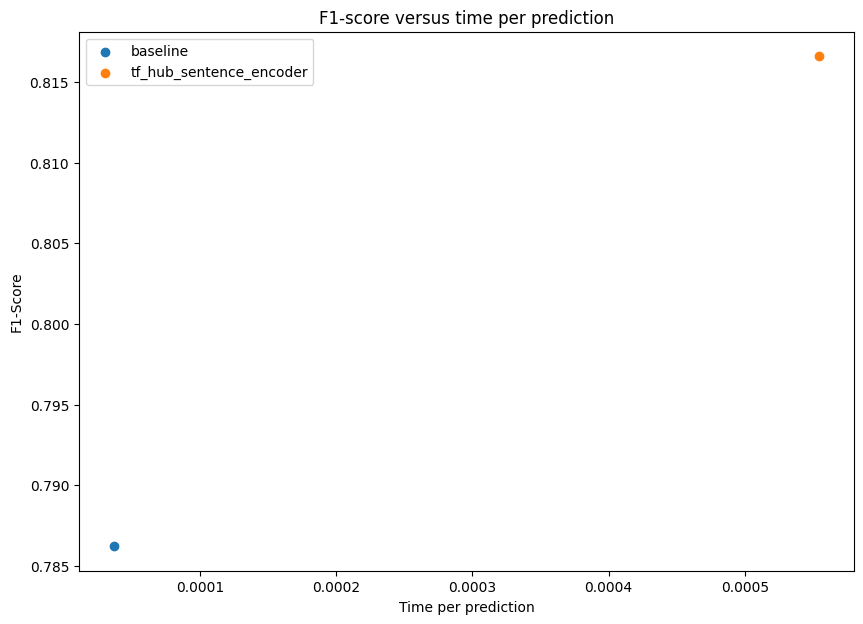

In [178]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f_score"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f_score"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");